In [17]:
import networkx as nx
import matplotlib.pyplot as plt
from operator import itemgetter

%matplotlib inline

# 1. (1/1)

/home/f4119597/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


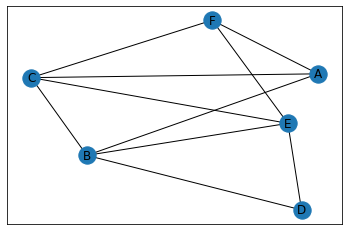

In [152]:
g = nx.Graph()
g.add_edges_from([('A', 'F'), ('F', 'E'), ('F', 'C'), ('A', 'C'), ('C', 'E'), 
                ('B', 'A'), ('B', 'C'), ('B', 'E'), ('B', 'D'), ('D', 'E'), ])

pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos)

In [153]:
degrees = dict(g.degree())
degree_sum = sum(dict(g.degree()).values())

degrees, degree_sum, len(g.nodes())

({'A': 3, 'F': 3, 'E': 4, 'C': 4, 'B': 4, 'D': 2}, 20, 6)

In [154]:
p_2 = 1/6
p_3 = 2/6

q1 = p_2 + p_3
q1

0.5

# 2. (0/1)

/home/f4119597/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


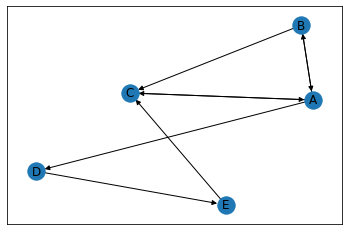

In [155]:
g = nx.DiGraph()
g.add_edges_from([('A', 'B'), ('A', 'C'), ('A', 'D'),
                    ('B', 'A'), ('B', 'C'), 
                    ('C', 'A'),
                    ('D', 'E'),
                    ('E', 'C')])

pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos)

In [159]:
nx.number_of_nodes(g), g.in_degree()

(5, InDegreeView({'A': 2, 'B': 1, 'C': 3, 'D': 1, 'E': 1}))

```k = 1``` is the most common degree

since our denominator is a fixed value ```nx.number_of_nodes(g)```

```3/nx.number_of_nodes(g)``` is the highest we can achieve

In [161]:
q2 = 1
q2

1

# 3. (1/1)

[x] If we draw a power law distribution...

[x] The Preferential Attachment Model generates...

# 4. (1/1)

[x] In the small-world model starting with k...

[x] Some small-world networks...

# 5. (1/1)

[x] Average local clustering will increase and average shortest path will decrease

# 6. (1/1)

/home/f4119597/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


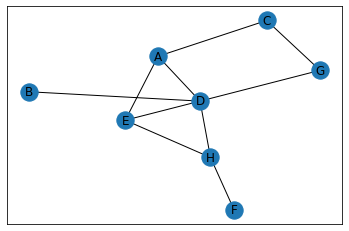

In [163]:
g = nx.Graph()
g.add_edges_from(
    [
        ('C', 'G'), ('C', 'A'), ('A', 'D'), ('A', 'E'), ('G', 'D'), 
        ('D', 'E'), ('D', 'B'), ('E', 'H'), ('D', 'H'), ('H', 'F')
    ])

pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos)

In [184]:
comm_neig = sorted([(e[0], e[1], len(list(nx.common_neighbors(g, e[0], e[1])))) for e in nx.non_edges(g)],
                   key=itemgetter(2),
                   reverse=True)


In [186]:
pairs_H = [(node, h, common) for (node, h, common) in comm_neig if (node == 'H' or h == 'H')]

[('A', 'H', 2), ('H', 'G', 1), ('H', 'B', 1), ('H', 'C', 0)]

In [189]:
q6 = pairs_H[0][0]
q6

'A'

# 7. (1/1)

In [84]:
# Number of neighbors normalized by the total number of neighbors
jacc = list(nx.jaccard_coefficient(g))
# jacc

In [97]:
q7_ = [wanted for wanted in jacc if (wanted[0] == 'D' and wanted[1] == 'C')]

In [98]:
q7 = q7_[0][2]
q7

0.4

# 8. (1/1)

In [169]:
rai = list(nx.resource_allocation_index(g))

In [174]:
q3_ = [wanted for wanted in rai if (wanted[0] == 'D' and wanted[1] == 'C')]

In [176]:
q3 = q3_[0][2]
q3

0.8333333333333333

# 9. (1/1)

In [93]:
pref = sorted(list(nx.preferential_attachment(g)), key=itemgetter(2), reverse=True)

In [99]:
q9_ = [wanted for wanted in pref if (wanted[0] == 'D' and wanted[1] == 'C')]

In [101]:
q9 = q9_[0][2]
q9

10

# 10. (1/1)

In [ ]:
g_comm = g.copy()

In [103]:
comm0 = 'A B C D G'.split()
comm1 = 'E F H'.split()

comm0, comm1

(['A', 'B', 'C', 'D', 'G'], ['E', 'F', 'H'])

In [117]:
for node in comm0:
    g_comm.node[node]['community'] = 0

for node in comm1:
    g_comm.node[node]['community'] = 1

In [124]:
# Acknowledge the community value
g_comm.node(data=True)

NodeDataView({'C': {'community': 0}, 'G': {'community': 0}, 'A': {'community': 0}, 'D': {'community': 0}, 'E': {'community': 1}, 'B': {'community': 0}, 'H': {'community': 1}, 'F': {'community': 1}})

In [141]:
cn_soun_hop = list(nx.cn_soundarajan_hopcroft(g_comm))
# cn_soun_hop

In [139]:
item1 = [wanted for wanted in cn_soun_hop if (wanted[0] == 'D' and wanted[1] == 'C')]
item1 # False

[('D', 'C', 4)]

In [140]:
item2 = [wanted for wanted in cn_soun_hop if (wanted[0] == 'A' and wanted[1] == 'G')]
item2 # True

[('A', 'G', 4)]

In [148]:
ra_sound_hop = list(nx.ra_index_soundarajan_hopcroft(g_comm))
# ra_sound_hop

In [146]:
item3 = [wanted for wanted in ra_sound_hop if (wanted[0] == 'E' and wanted[1] == 'F')]
item3 # False

[('E', 'F', 0.3333333333333333)]

In [147]:
item3 = [wanted for wanted in ra_sound_hop if (wanted[0] == 'A' and wanted[1] == 'G')]
item3 # True

[('A', 'G', 0.7)]

[x] The **Commom** ... of node 'A' and node 'G' is 4

[x] The **Resource** ... of node 'A' and node 'G' is 0.7


EOF